In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

features = ['sepal length','sepal width','petal length','petal width']
label = ['target']

allnames = []
allnames.extend(features)
allnames.extend(label)

df = pd.read_csv(url, names=allnames)
print(df.head())
print(df.columns)

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'target'], dtype='object')


In [2]:
from sklearn.preprocessing import StandardScaler

x = df.loc[:, features].values
y = df.loc[:,label].values
print(x[0:5])
print()
x = StandardScaler().fit_transform(x)
print(x[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [3]:
from sklearn.decomposition import PCA

pca2d = PCA(n_components=2)
pcs = pca2d.fit_transform(x)
pcsdf2d = pd.DataFrame(data = pcs
             , columns = ['PC 1', 'PC 2'])

pca3d = PCA(n_components=3)
pcs = pca3d.fit_transform(x)
pcsdf3d = pd.DataFrame(data = pcs
             , columns = ['PC 1', 'PC 2', 'PC 3'])

finaldf2d = pd.concat([pcsdf2d, df[label]], axis = 1)
finaldf3d = pd.concat([pcsdf3d, df[label]], axis = 1)
print(finaldf2d.head())
print(finaldf3d.head())

       PC 1      PC 2       target
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa
       PC 1      PC 2      PC 3       target
0 -2.264542  0.505704 -0.121943  Iris-setosa
1 -2.086426 -0.655405 -0.227251  Iris-setosa
2 -2.367950 -0.318477  0.051480  Iris-setosa
3 -2.304197 -0.575368  0.098860  Iris-setosa
4 -2.388777  0.674767  0.021428  Iris-setosa


In [21]:
# print the coefficients of the first two PC
print(pca2d.components_)
for i in range(pca2d.components_.shape[0]):
    print("PC " , i+1, "=  ")
    for j in range(pca2d.components_.shape[1]):
        print( "  %6.2f"%(pca2d.components_[i,j]**2) ,\
          " * ", features[j])

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]
PC  1 =  
    0.27  *  sepal length
    0.07  *  sepal width
    0.34  *  petal length
    0.32  *  petal width
PC  2 =  
    0.14  *  sepal length
    0.86  *  sepal width
    0.00  *  petal length
    0.00  *  petal width


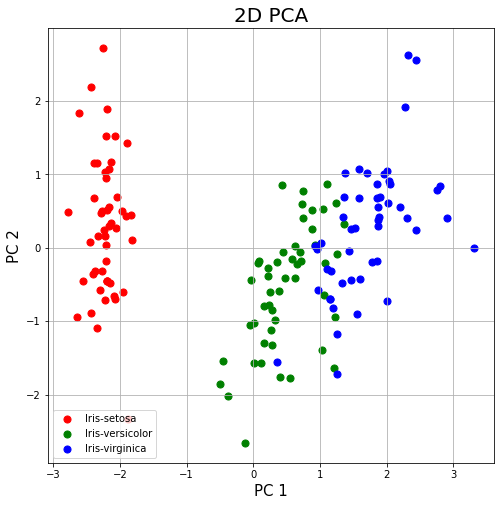

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)

stargets = set(df[label].values.flatten())
targets = list(stargets)
assert len(targets) == 3
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indices = finaldf2d[label[0]] == target
    ax.scatter(finaldf2d.loc[indices, 'PC 1']
               , finaldf2d.loc[indices, 'PC 2']
               , c = color
               , s = 50)
plt.legend(targets, loc='lower left')
ax.grid()

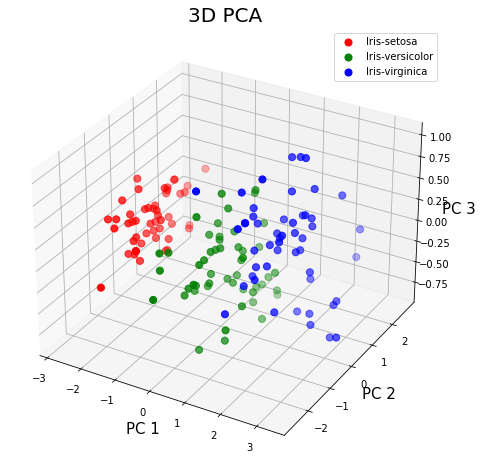

In [5]:
# 3D plot of the PCA
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('3D PCA', fontsize = 20)

for target, color in zip(targets,colors):
    indices = finaldf3d[label[0]] == target
    ax.scatter(finaldf3d.loc[indices, 'PC 1']
               , finaldf3d.loc[indices, 'PC 2']
               , finaldf3d.loc[indices, 'PC 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

[0.72770452 0.23030523]
0.9580097536148199
[0.72770452 0.23030523 0.03683832]
0.9948480731910938


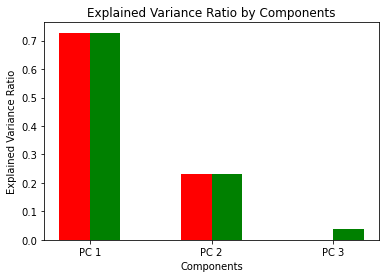

In [6]:
import numpy as np

print(pca2d.explained_variance_ratio_)
print(pca2d.explained_variance_ratio_.sum())
print(pca3d.explained_variance_ratio_)
print(pca3d.explained_variance_ratio_.sum())

N = 3
ind = np.arange(1,N+1)
width = 0.25

d2vals = list(pca2d.explained_variance_ratio_)
d2vals.extend([0])
plt.bar(ind, d2vals, width, color = 'r')   
d3vals = pca3d.explained_variance_ratio_
plt.bar(ind+width, d3vals, width, color='g') 

plt.xlabel("Components")
plt.ylabel('Explained Variance Ratio')
plt.title("Explained Variance Ratio by Components")

plt.xticks(ind+(width/2),['PC 1', "PC 2", "PC 3"]) 
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(\
    x, y, test_size=0.2, random_state=0)
trainsamples = x_train.shape[0]
testsamples = x_test.shape[0]
logreg = LogisticRegression()
print(x_train.shape)
print(y_train.shape)
logreg.fit(x_train, y_train.reshape(trainsamples))
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(\
    logreg.score(x_test, y_test.reshape(testsamples))))

(120, 4)
(120, 1)
Accuracy of logistic regression classifier on test set: 1.00


In [8]:
for n in range(1, x.shape[1]+1):
    x = df.loc[:, features].values
    y = df.loc[:,label].values
    pca = PCA(n_components=n)
    # IMPORTANT in principle one shold use the same scaler for train and test
    # the sample apply to the PCA
    x_t = pca.fit_transform(StandardScaler().fit_transform(x))
    x_train, x_test, y_train, y_test = train_test_split(\
        x_t, y, test_size=0.2, random_state=0)
    trainsamples = x_train.shape[0]
    testsamples = x_test.shape[0]
    print(x_train.shape)
    print(y_train.shape)
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train.reshape(trainsamples))
    y_pred = logreg.predict(x_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(
        logreg.score(x_test, y_test.reshape(testsamples))))


(120, 1)
(120, 1)
Accuracy of logistic regression classifier on test set: 0.87
(120, 2)
(120, 1)
Accuracy of logistic regression classifier on test set: 0.87
(120, 3)
(120, 1)
Accuracy of logistic regression classifier on test set: 1.00
(120, 4)
(120, 1)
Accuracy of logistic regression classifier on test set: 1.00
